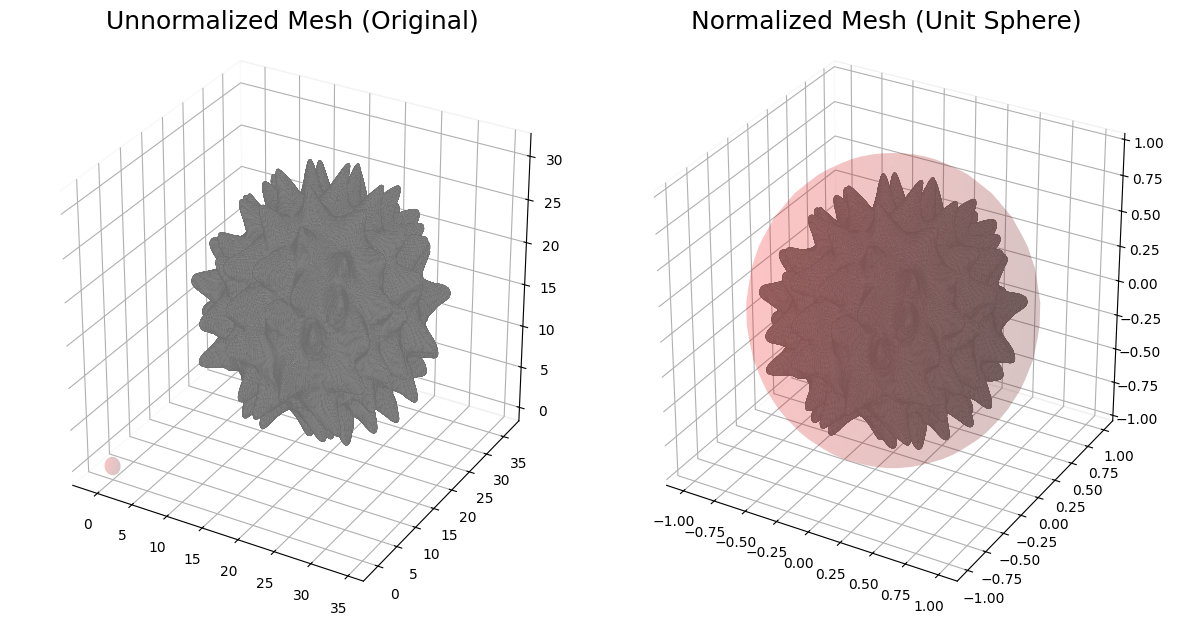

In [1]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Mesh laden
mesh_path = r"c:/Users/super/Documents/Github/sequoia/data/processed/interim/17818_Common_daisy_Bellis_perennis_pollen_grain_back.stl"
mesh = trimesh.load(mesh_path, force="mesh")
vertices = mesh.vertices
faces = mesh.faces

# Normalisiertes Mesh: zentriert und auf Einheitssphäre skaliert
center = vertices.mean(axis=0)
verts_centered = vertices - center
radius = np.linalg.norm(verts_centered, axis=1).max()
verts_normalized = verts_centered / radius

fig = plt.figure(figsize=(12, 6))
fig.patch.set_alpha(0.0)
# Unnormalized Mesh (Originalgröße und Position)
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
poly1 = Poly3DCollection(
    vertices[faces], facecolor="#d6d6d6", edgecolor="#6E6E6E", linewidths=0.3, alpha=1.0
)
ax1.add_collection3d(poly1)
# Einheitssphäre als Referenz (transparent, im Ursprung, Radius=1)
u, v = np.mgrid[0 : 2 * np.pi : 40j, 0 : np.pi : 20j]
x_sphere = np.cos(u) * np.sin(v)
y_sphere = np.sin(u) * np.sin(v)
z_sphere = np.cos(v)
ax1.plot_surface(x_sphere, y_sphere, z_sphere, color="red", alpha=0.12, linewidth=0)
ax1.set_title("Unnormalized Mesh (Original)", fontsize=18)
ax1.set_box_aspect([1, 1, 1])
# Grid: Nur Linien, keine grauen Flächen
ax1.grid(True)
ax1.xaxis.pane.set_facecolor((1, 1, 1, 0))
ax1.yaxis.pane.set_facecolor((1, 1, 1, 0))
ax1.zaxis.pane.set_facecolor((1, 1, 1, 0))

# Normalisiertes Mesh (zentriert und skaliert)
ax2 = fig.add_subplot(1, 2, 2, projection="3d")
poly2 = Poly3DCollection(
    verts_normalized[faces],
    facecolor="#CECCCC",
    edgecolor="#6E6E6E",
    linewidths=0.3,
    alpha=1.0,
)
ax2.add_collection3d(poly2)
ax2.plot_surface(x_sphere, y_sphere, z_sphere, color="red", alpha=0.12, linewidth=0)
ax2.set_title("Normalized Mesh (Unit Sphere)", fontsize=18)
ax2.set_box_aspect([1, 1, 1])
ax2.grid(True)
ax2.xaxis.pane.set_facecolor((1, 1, 1, 0))
ax2.yaxis.pane.set_facecolor((1, 1, 1, 0))
ax2.zaxis.pane.set_facecolor((1, 1, 1, 0))

plt.subplots_adjust(left=0.01, right=0.99, top=0.95, bottom=0.01, wspace=0.02)
plt.show()

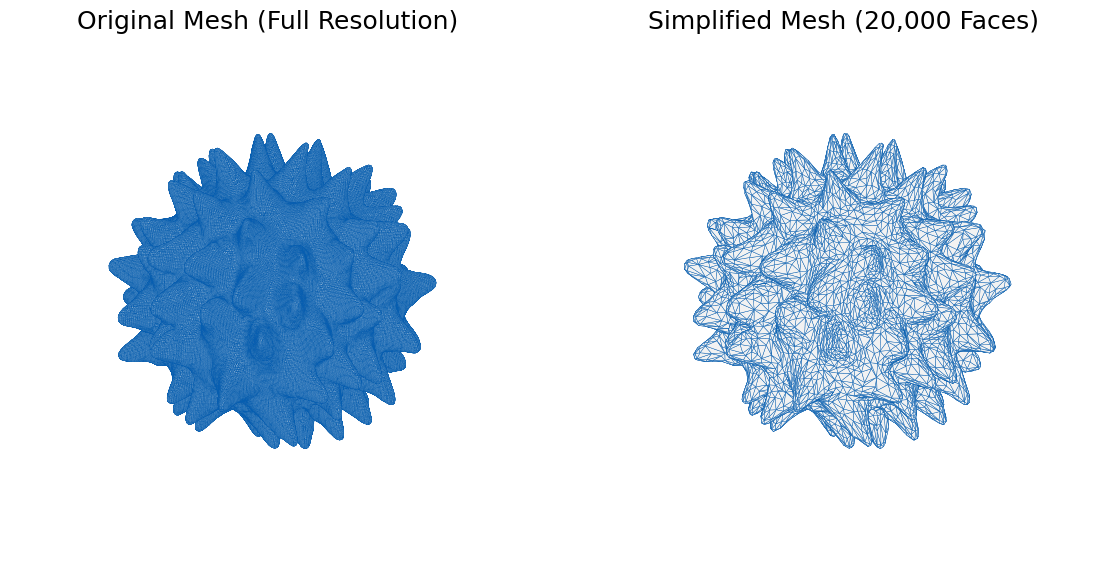

In [3]:
import open3d as o3d
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Load mesh with trimesh and convert to Open3D
mesh_path = r"c:/Users/super/Documents/Github/sequoia/data/processed/interim/17818_Common_daisy_Bellis_perennis_pollen_grain_back.stl"
mesh_trimesh = trimesh.load(mesh_path, force="mesh")
vertices = mesh_trimesh.vertices
faces = mesh_trimesh.faces

mesh_o3d = o3d.geometry.TriangleMesh()
mesh_o3d.vertices = o3d.utility.Vector3dVector(vertices)
mesh_o3d.triangles = o3d.utility.Vector3iVector(faces)

# Simplify mesh with quadric decimation
mesh_simplified = mesh_o3d.simplify_quadric_decimation(20000)
verts_simpl = np.asarray(mesh_simplified.vertices)
faces_simpl = np.asarray(mesh_simplified.triangles)

fig = plt.figure(figsize=(12, 6))
fig.patch.set_alpha(0.0)
# Original Mesh
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
poly1 = Poly3DCollection(
    vertices[faces], facecolor="#F2F2F2", edgecolor="#065EB0", linewidths=0.3, alpha=1.0
)
ax1.add_collection3d(poly1)
ax1.set_title("Original Mesh (Full Resolution)", fontsize=18, pad=8)
ax1.set_box_aspect([1, 1, 1])
# Weniger Abstand: Achsenlimits enger setzen
margin = 0.03
xlim = (vertices[:, 0].min(), vertices[:, 0].max())
ylim = (vertices[:, 1].min(), vertices[:, 1].max())
zlim = (vertices[:, 2].min(), vertices[:, 2].max())
xr = xlim[1] - xlim[0]
yr = ylim[1] - ylim[0]
zr = zlim[1] - zlim[0]
ax1.set_xlim(xlim[0] + margin * xr, xlim[1] - margin * xr)
ax1.set_ylim(ylim[0] + margin * yr, ylim[1] - margin * yr)
ax1.set_zlim(zlim[0] + margin * zr, zlim[1] - margin * zr)
ax1.set_axis_off()  # Achsen ausblenden

# Simplified Mesh
ax2 = fig.add_subplot(1, 2, 2, projection="3d")
poly2 = Poly3DCollection(
    verts_simpl[faces_simpl],
    facecolor="#F2F2F2",
    edgecolor="#065EB0",
    linewidths=0.3,
    alpha=1.0,
)
ax2.add_collection3d(poly2)
ax2.set_title("Simplified Mesh (20,000 Faces)", fontsize=18, pad=8)
ax2.set_box_aspect([1, 1, 1])
xlim2 = (verts_simpl[:, 0].min(), verts_simpl[:, 0].max())
ylim2 = (verts_simpl[:, 1].min(), verts_simpl[:, 1].max())
zlim2 = (verts_simpl[:, 2].min(), verts_simpl[:, 2].max())
xr2 = xlim2[1] - xlim2[0]
yr2 = ylim2[1] - ylim2[0]
zr2 = zlim2[1] - zlim2[0]
ax2.set_xlim(xlim2[0] + margin * xr2, xlim2[1] - margin * xr2)
ax2.set_ylim(ylim2[0] + margin * yr2, ylim2[1] - margin * yr2)
ax2.set_zlim(zlim2[0] + margin * zr2, zlim2[1] - margin * zr2)
ax2.set_axis_off()  # Achsen ausblenden

plt.subplots_adjust(left=0.03, right=0.97, top=0.93, bottom=0.07, wspace=0.04)
plt.show()

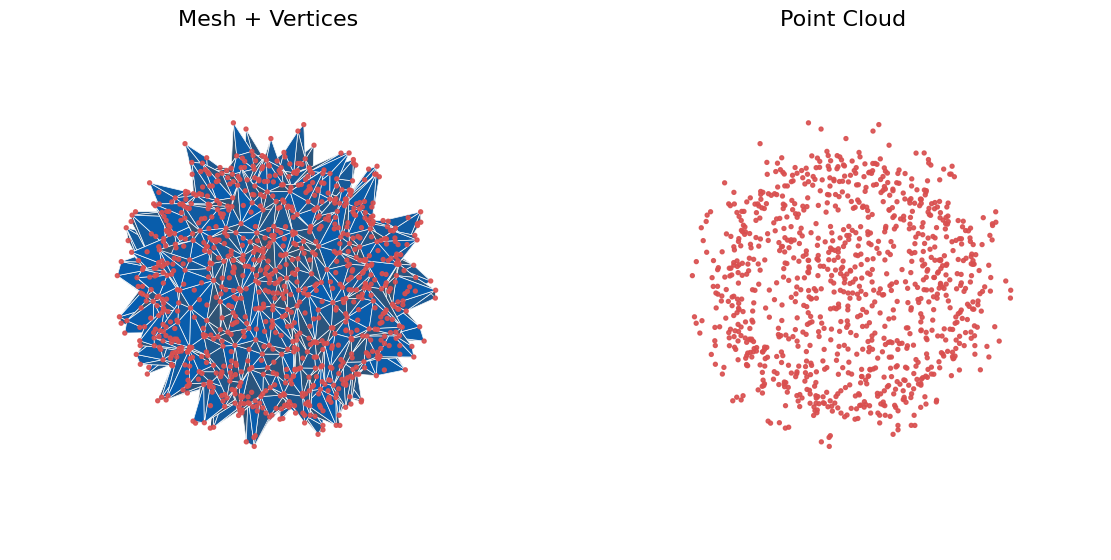

In [31]:
import matplotlib.pyplot as plt
import trimesh
import numpy as np
import open3d as o3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Mesh laden und vereinfachen (wie zuvor)
mesh_path = r"c:/Users/super/Documents/Github/sequoia/data/processed/interim/17818_Common_daisy_Bellis_perennis_pollen_grain_back.stl"
mesh = trimesh.load(mesh_path, force="mesh")
vertices = mesh.vertices
faces = mesh.faces
mesh_o3d = o3d.geometry.TriangleMesh()
mesh_o3d.vertices = o3d.utility.Vector3dVector(vertices)
mesh_o3d.triangles = o3d.utility.Vector3iVector(faces)
mesh_simplified = mesh_o3d.simplify_quadric_decimation(2000)
verts_simpl = np.asarray(mesh_simplified.vertices)
faces_simpl = np.asarray(mesh_simplified.triangles)

# Simuliertes Shading für Tiefenwirkung: Licht aus Richtung (1, 1, 0.5)
light_dir = np.array([1, 1, 0.5])
light_dir = light_dir / np.linalg.norm(light_dir)
face_vertices = verts_simpl[faces_simpl]  # (n_faces, 3, 3)
face_normals = np.cross(
    face_vertices[:, 1] - face_vertices[:, 0], face_vertices[:, 2] - face_vertices[:, 0]
)
face_normals = face_normals / np.linalg.norm(face_normals, axis=1, keepdims=True)
# Weicheres Shading: Minimum erhöhen und mit Weiß mischen
shading = np.clip(np.dot(face_normals, light_dir), 0.4, 1)
base_color = np.array([6, 94, 176]) / 255.0  # #065EB0 als RGB
face_colors = [base_color * s + (1 - s) * 0.3 * np.array([1, 1, 1]) for s in shading]

fig = plt.figure(figsize=(12, 6))
fig.patch.set_alpha(0.0)
# Links: Gefülltes Mesh (blau, mit Tiefenschattierung) + weiße Linien + rötliche Vertices
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
poly1 = Poly3DCollection(
    face_vertices, facecolor=face_colors, edgecolor="white", linewidths=0.5, alpha=1.0
)
ax1.add_collection3d(poly1)
ax1.scatter(
    verts_simpl[:, 0], verts_simpl[:, 1], verts_simpl[:, 2], s=8, c="#D94F4F", alpha=0.9
)
ax1.set_title("Mesh + Vertices", fontsize=16)
ax1.set_box_aspect([1, 1, 1])
# Kamerawinkel für bessere Tiefenwirkung
ax1.view_init(elev=20, azim=45)
margin = 0.03
xlim = (verts_simpl[:, 0].min(), verts_simpl[:, 0].max())
ylim = (verts_simpl[:, 1].min(), verts_simpl[:, 1].max())
zlim = (verts_simpl[:, 2].min(), verts_simpl[:, 2].max())
xr = xlim[1] - xlim[0]
yr = ylim[1] - ylim[0]
zr = zlim[1] - zlim[0]
ax1.set_xlim(xlim[0] + margin * xr, xlim[1] - margin * xr)
ax1.set_ylim(ylim[0] + margin * yr, ylim[1] - margin * yr)
ax1.set_zlim(zlim[0] + margin * zr, zlim[1] - margin * zr)
ax1.set_axis_off()
# Rechts: Point Cloud (rötlich)
ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.scatter(
    verts_simpl[:, 0], verts_simpl[:, 1], verts_simpl[:, 2], s=8, c="#D94F4F", alpha=0.9
)
ax2.set_title("Point Cloud", fontsize=16)
ax2.set_box_aspect([1, 1, 1])
# Gleicher Kamerawinkel für Konsistenz
ax2.view_init(elev=20, azim=45)
ax2.set_xlim(xlim[0] + margin * xr, xlim[1] - margin * xr)
ax2.set_ylim(ylim[0] + margin * yr, ylim[1] - margin * yr)
ax2.set_zlim(zlim[0] + margin * zr, zlim[1] - margin * zr)
ax2.set_axis_off()
plt.subplots_adjust(left=0.03, right=0.97, top=0.93, bottom=0.07, wspace=0.04)
plt.show()